#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [8]:
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.50, random_state=0)

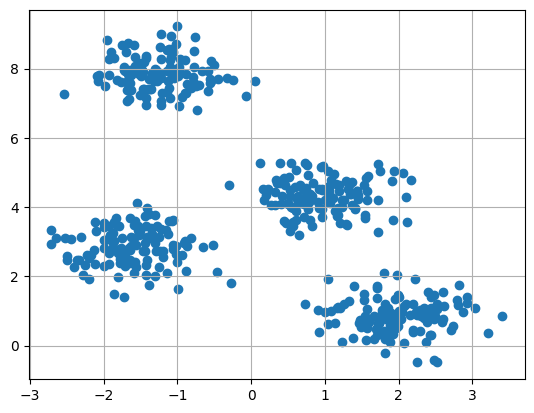

In [9]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
plt.show()

#Step 3 : Modeling The Data Using DBSCAN



Estimated number of clusters: 4
Estimated number of noise points: 97
['y', 'b', 'g', 'r']


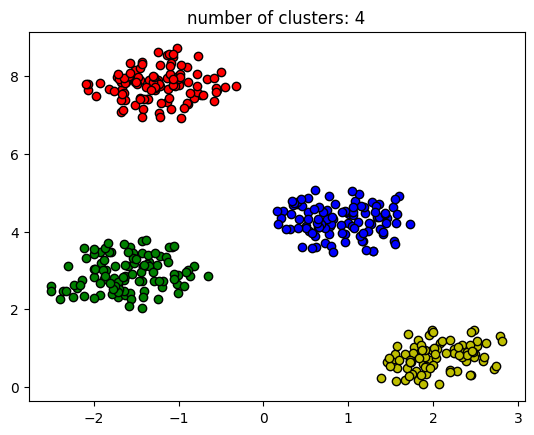

In [13]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_noise_ = list(labels).count(-1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [18]:
print(f"Homogeneity: {metrics.homogeneity_score(y_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(y_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")
     

Homogeneity: 0.811
Completeness: 0.700
V-measure: 0.751
Adjusted Rand Index: 0.701
Adjusted Mutual Information: 0.749
Silhouette Coefficient: 0.500


#**Well Done :)**